In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
test=pd.read_csv('D:/JOB/PYTHON/KRISH_NAIK/titanic/test.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train=pd.read_csv('D:/JOB/PYTHON/KRISH_NAIK/titanic/train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###  OBSERVATION

1.NULL VALUES ARE PRESENT ONLY IN CABIN,AGE AND EMBARKED.  
2.DATA MISSING IN AGE IS ROUGHLY 20% THUS IT IS REASONABLE TO REPLACE THE NULL VALUES.  
3.DATA MISSING IN CABIN IS HIGH FOR ANY REASONABLE REPRESENTATION THUS WE WILL DROP THE VALUES.  


<AxesSubplot:>

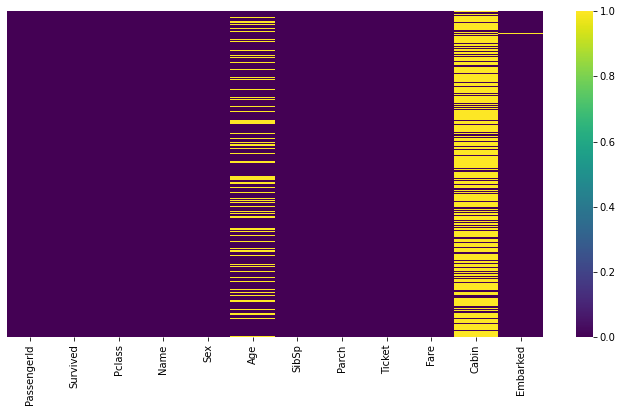

In [9]:
##VISUAL REPRESENTATION OF THE ABOVE
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [10]:
train.drop(['Cabin','Name'],inplace=True,axis=1)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

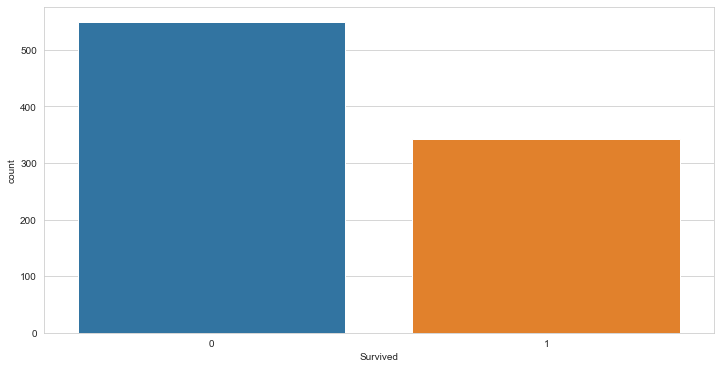

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

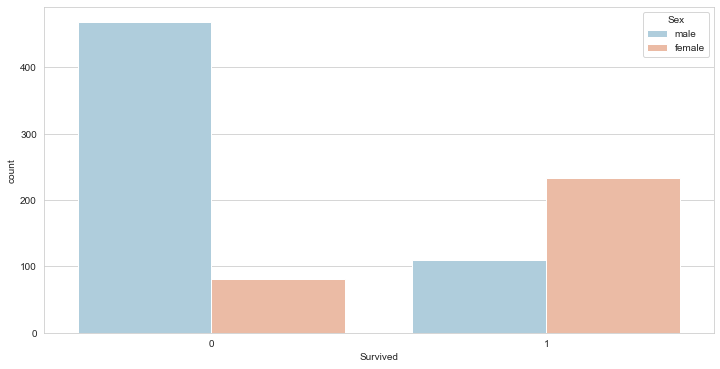

In [13]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')


In [14]:
## converting categorical features into 1 and zero
train['Sex']=pd.get_dummies(train['Sex'],drop_first=True)

In [15]:
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

### OBSERVATION

Based upon the above observation we can see that 

<AxesSubplot:xlabel='Survived', ylabel='count'>

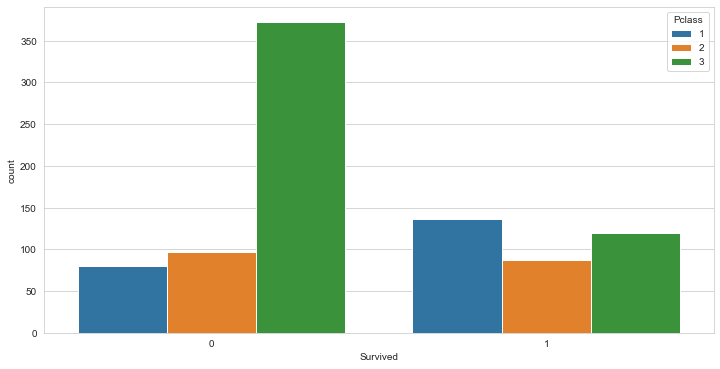

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\789456\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

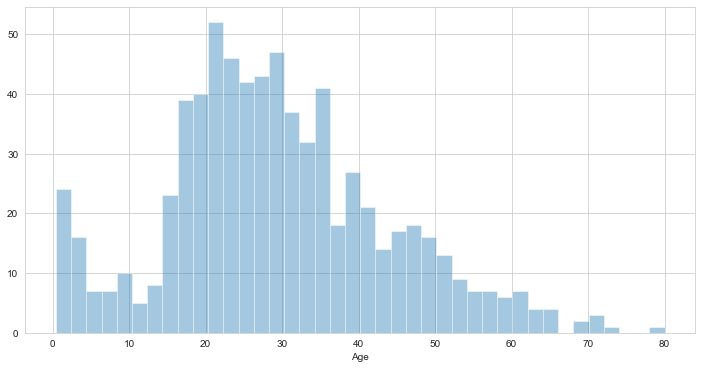

In [17]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

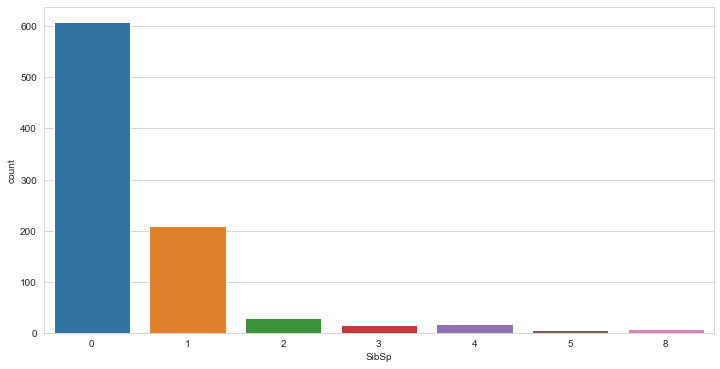

In [18]:
sns.countplot(x='SibSp',data=train)

C:\Users\789456\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

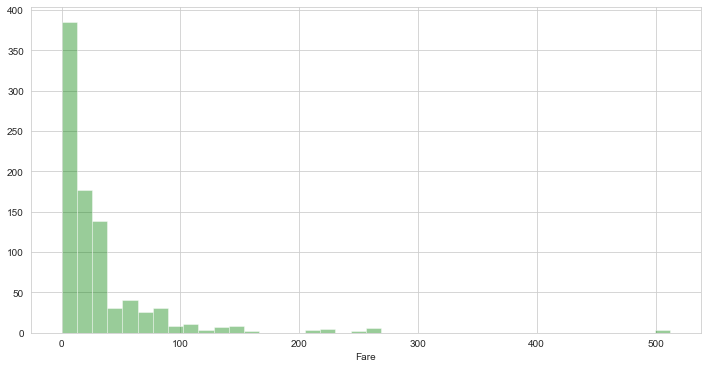

In [19]:
sns.distplot(train['Fare'],kde=False,bins=40,color='green')

### Data cleaning

We are going to fill the ages having null value instead of just removing rows with null values.
For that we will use the mean age of all passenger classes.


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

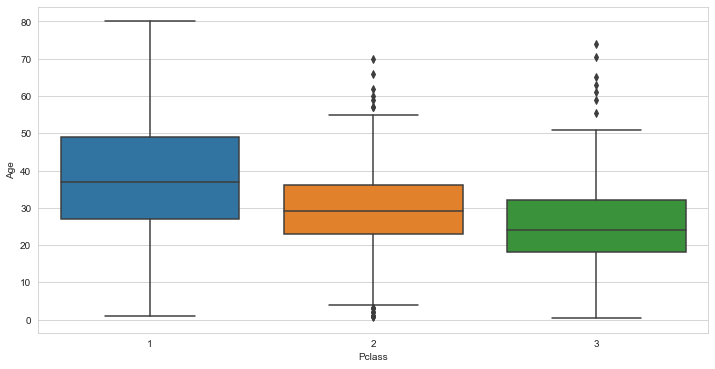

In [20]:
sns.boxplot(data=train,x='Pclass',y='Age')

### Conclusions
1. In Pclass 1 we have the mean age of 37 years.
2. In Pclass 2 we have the mean age of 29 years.
3. In Pclass 3 we have the mean age of 24 years.

so we will replace the null values of age in Pclass 1 with 37,  
null values in Pclass 2 with 29,   
null values in Pclass 3 with 24.  

In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [22]:
##defining a function to remove null values

def calc_Age(num):
    Age=num[0]
    Pclass=num[1]
    if pd.isnull(Age):
        
        if Pclass==1: 
            return 37
        
        elif Pclass==2:
            return 29
    
        elif Pclass==3: 
            return 24
    else: return Age




In [23]:
num=list()
train['Age']=train[['Age','Pclass']].apply(calc_Age,axis=1)

In [24]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<AxesSubplot:>

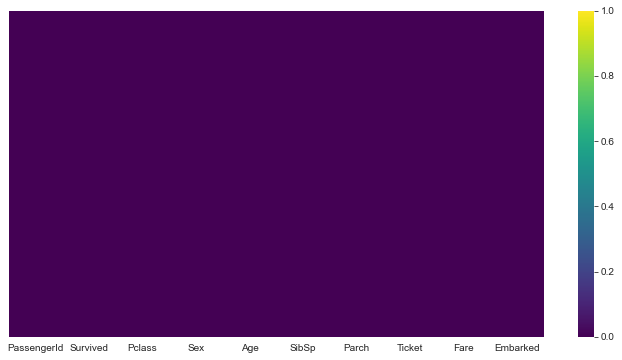

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [26]:
##drop passengerID and ticket and also convert embarked into embarked.

train.drop(['PassengerId','Ticket'],axis=1,inplace=True)


In [27]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C


In [29]:
train=pd.concat([train,embark],axis=1)

In [30]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,1
1,1,1,0,38.0,1,0,71.2833,C,0,0


In [31]:
train.drop('Embarked',inplace=True,axis=1)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [33]:
train.rename(columns={'Sex':'Male'},inplace=True)

In [34]:
train.head(2)

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0


THE DATA IS READY FOR OUR MODEL.  
  
    
### LOGISTIC REGRESSION MODEL

In [35]:
X=train.drop('Survived',axis=1)

In [36]:
X.head(2)

,Pclass,Male,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0


In [37]:
y=train['Survived']

In [38]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

### Training and predicting

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel=LogisticRegression()


In [43]:
logmodel.fit(X_train,y_train)

C:\Users\789456\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
X_train.shape

(623, 8)

In [45]:
y_train.shape

(623,)

In [46]:
predictions= logmodel.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
accuracy=confusion_matrix(y_test,predictions)

In [49]:
accuracy

array([[133,  21],
       [ 38,  76]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
acccuracy=accuracy_score(y_test,predictions)


In [52]:
accuracy

array([[133,  21],
       [ 38,  76]], dtype=int64)